In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib
import random as rand
from matplotlib import pyplot as plt
from itertools import product
import itertools
import time
import re
import csv
from hurst import compute_Hc
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
import statsmodels.api as sm
import tqdm

%matplotlib inline

In [2]:
plt.rcParams["axes.labelsize"] = 16. 
plt.rcParams["xtick.labelsize"] = 14. 
plt.rcParams["ytick.labelsize"] = 14. 
plt.rcParams["legend.fontsize"] = 12. 
plt.rcParams["figure.figsize"] = [17., 8.]

## Import CSV data
With DDPG agent

In [3]:
data_ddpg = pd.read_csv('data/comparing_rows/agent_with_ddpg.csv')
data_ddpg.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0


And without DDPG agent

In [4]:
data_default = pd.read_csv('data/comparing_rows/agent_without_ddpg.csv')
data_default.head(5)

,Id,price,volume,bid_price,ask_price,bid_volume,ask_volume,MM1,LC1,MT1,MRT1,NT1,DDPG1
0,0,100.82,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
1,1,100.78,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
2,2,100.74,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
3,3,100.69,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0
4,4,100.65,0.0,100.0,100.0,1,1,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
kk. =pd.read_csv('data/comparing_rows/agent_without_ddpg.csv')

------
Returns data

In [5]:
data_ddpg['returns'] = data_ddpg["price"].pct_change()
data_default['returns'] = data_default["price"].pct_change()

### DDPG price and returns

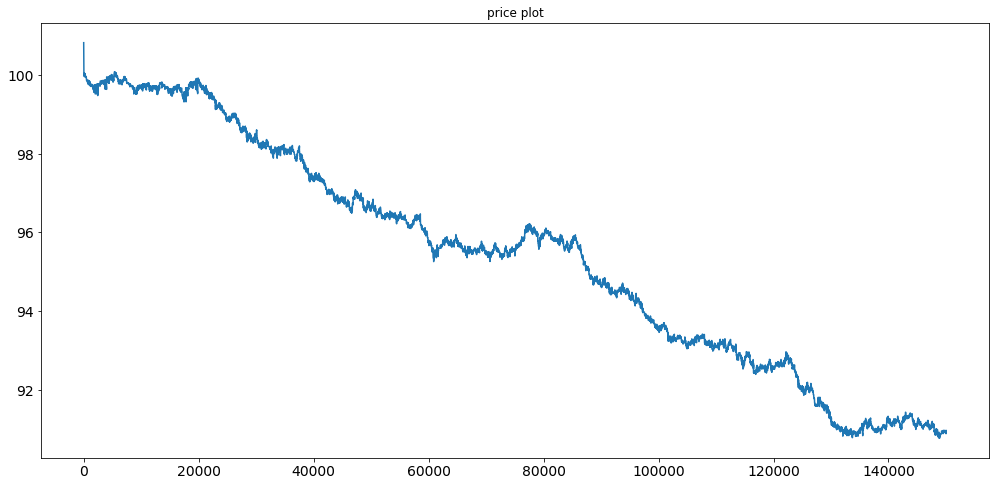

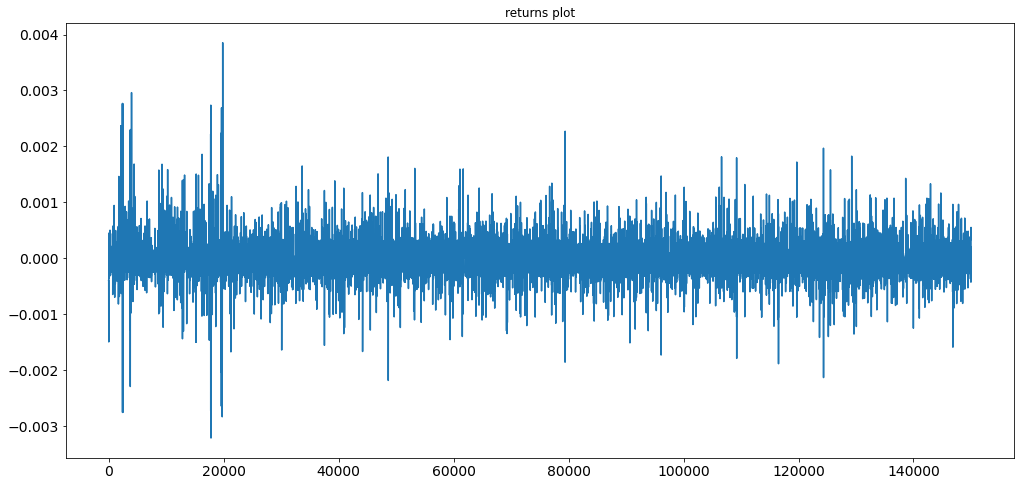

In [6]:
plt.plot(data_ddpg['price'])
plt.title('price plot')
plt.show()

plt.plot(data_ddpg['returns'])
plt.title('returns plot')
plt.show()

### Default price and returns

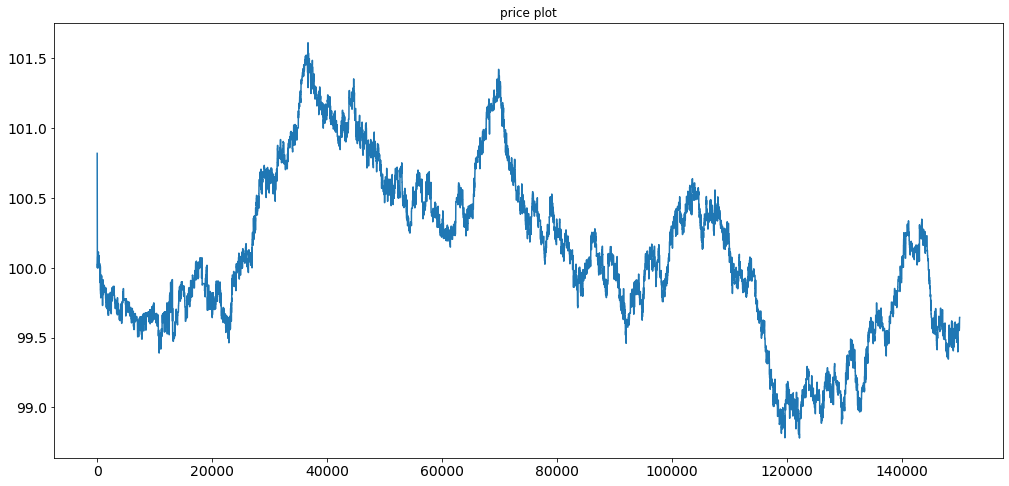

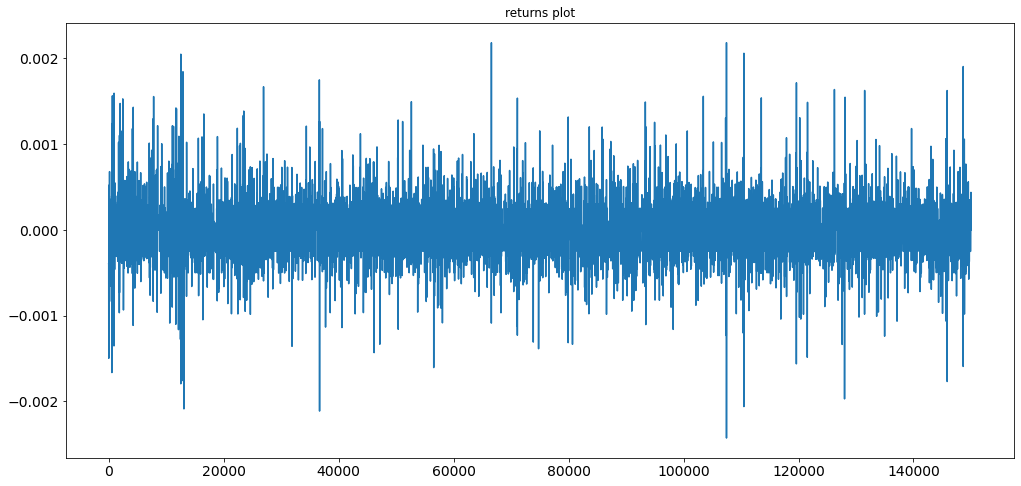

In [7]:
plt.plot(data_default['price'])
plt.title('price plot')
plt.show()

plt.plot(data_default['returns'])
plt.title('returns plot')
plt.show()

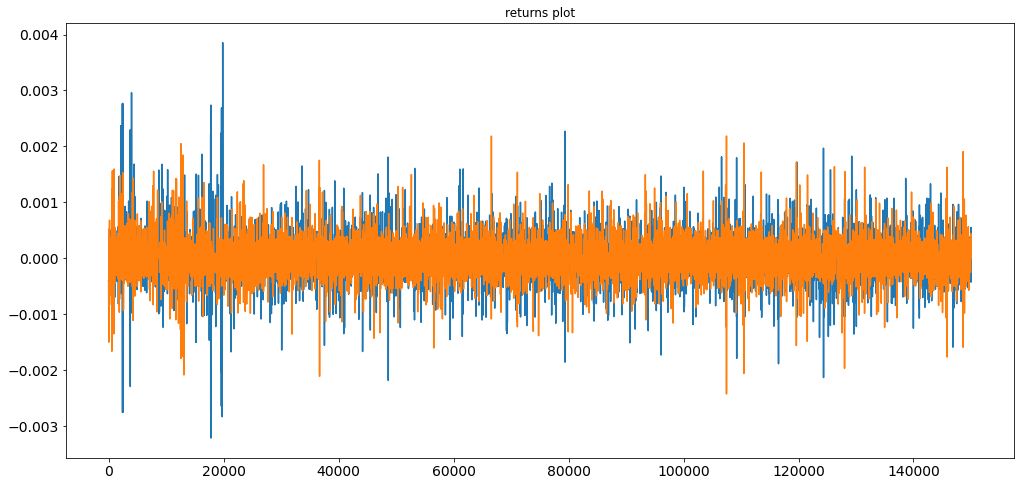

In [8]:
plt.plot(data_ddpg['returns'])
plt.title('returns plot')
plt.plot(data_default['returns'])
plt.title('returns plot')
plt.show()

In [9]:
np.sum(data_ddpg['returns'])

-0.1020911762354475

In [10]:
np.sum(data_default['returns'])

-0.011213451029500221

In [49]:
arr_default = []
for k in data_default['returns'].fillna(0):
    if abs(k)>0:
        arr_default.append(k)
        
arr_ddpg = []
for k in data_ddpg['returns'].fillna(0):
    if abs(k)>0:
        arr_ddpg.append(k)

-------
## Fat tailed distribution comparing  

Let use kurtosis value (4'th moment) to calculate value of the tail of returns

In [8]:
kurt_list_ddpg = [data_ddpg["price"].pct_change(k).kurt() for k in range(3000)]
kurt_list_default = [data_default["price"].pct_change(k).kurt() for k in range(3000)]

In [36]:
data_ddpg["price"].pct_change().kurt()

161.69376554081492

In [37]:
data_default["price"].pct_change().kurt()

113.79411530680656

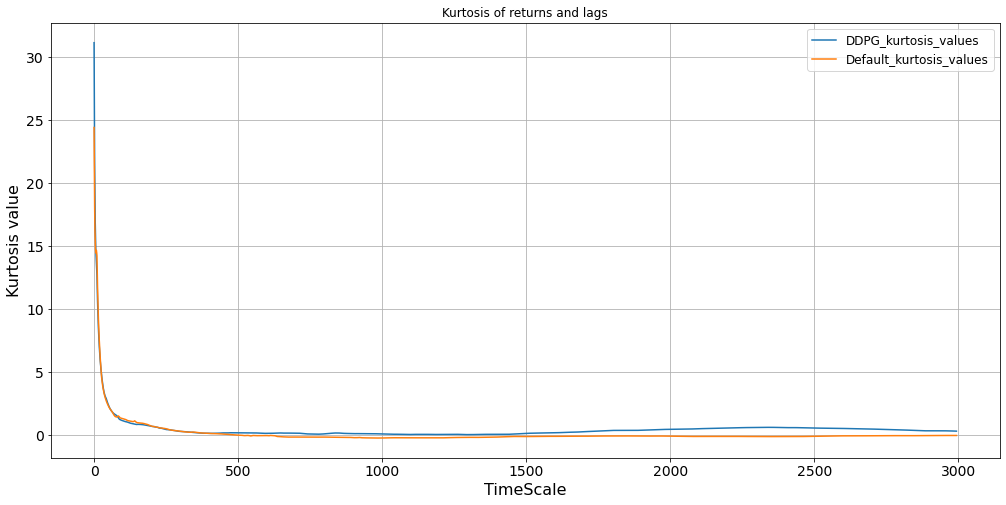

In [9]:
plt.plot(kurt_list_ddpg[5:], label = 'DDPG_kurtosis_values')
plt.plot(kurt_list_default[5:], label = 'Default_kurtosis_values')
plt.title('Kurtosis of returns and lags')
plt.xlabel('TimeScale')
plt.ylabel('Kurtosis value')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
data_default['returns'].fillna(0).kurt()

113.79489380762183

In [27]:
data_ddpg['returns'].fillna(0).kurt()

161.694863020109

Along the abscissa axis, the kurtosis value readings are plotted depending on the degree of differentiation of the series

------
## Volatility clustering comparing  

We can use autocorrealtion of squared returns function as measure of volatility clustering (ARCH effect)  

Also we can use returns in other degrees to calculate other data (GARCH effect).

Default plot

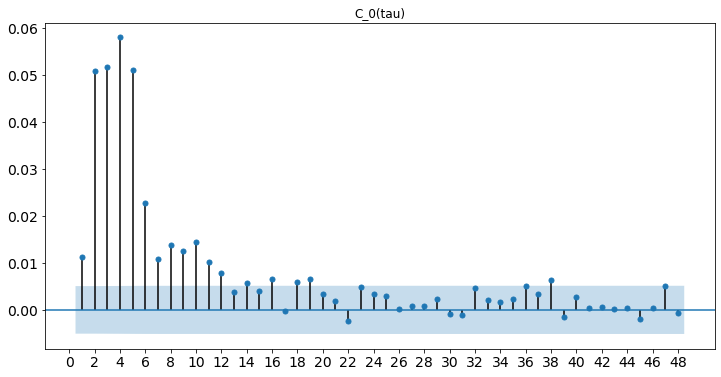

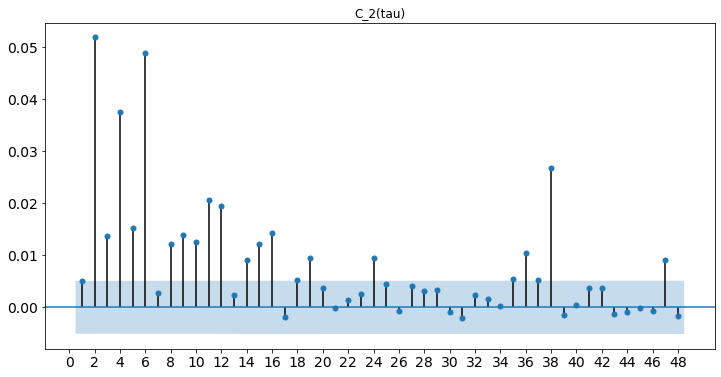

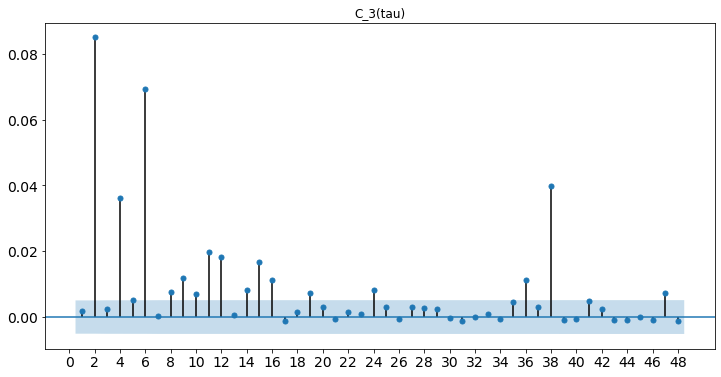

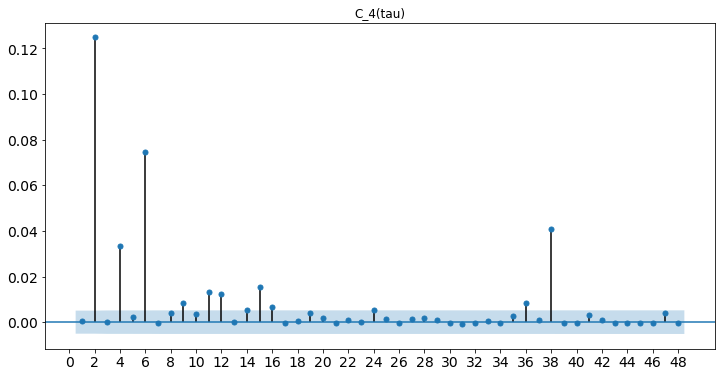

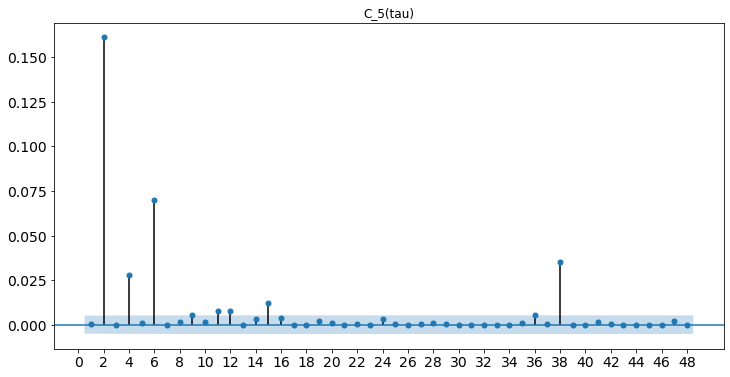

In [17]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(np.log(1+abs(data_default['returns'].fillna(0))), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_0(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_2(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**3), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_3(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**4), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_4(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_default['returns'].fillna(0)**5), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_5(tau)')
plt.show()

DDPG plot

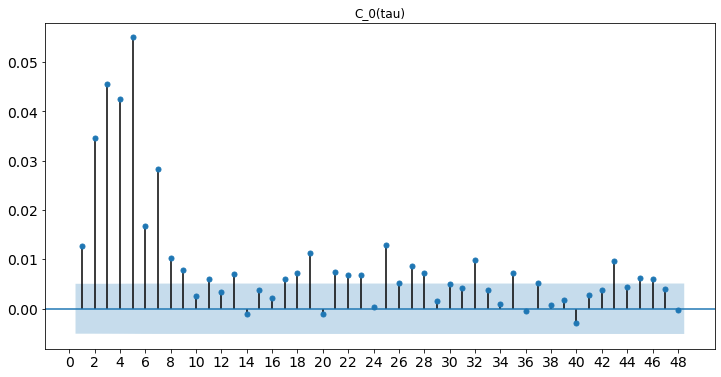

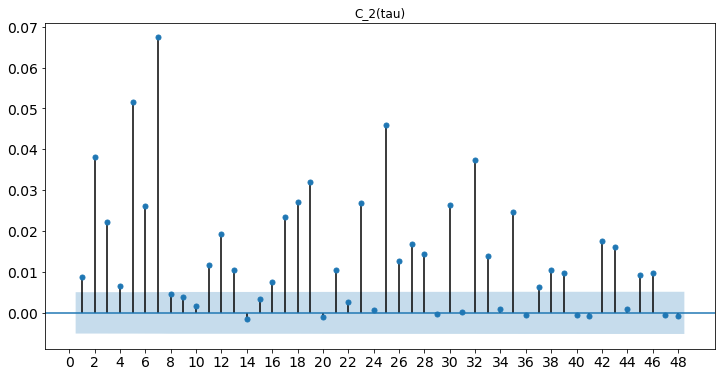

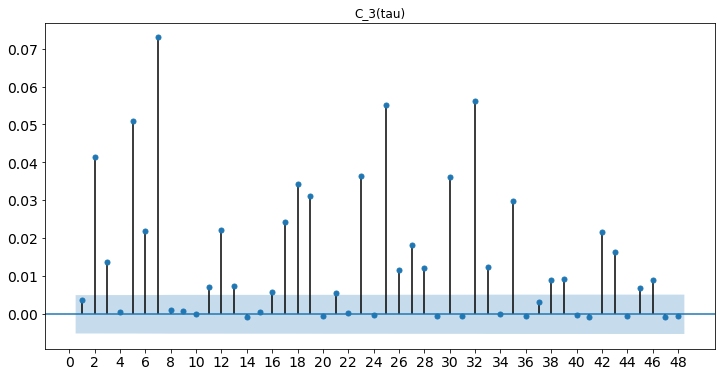

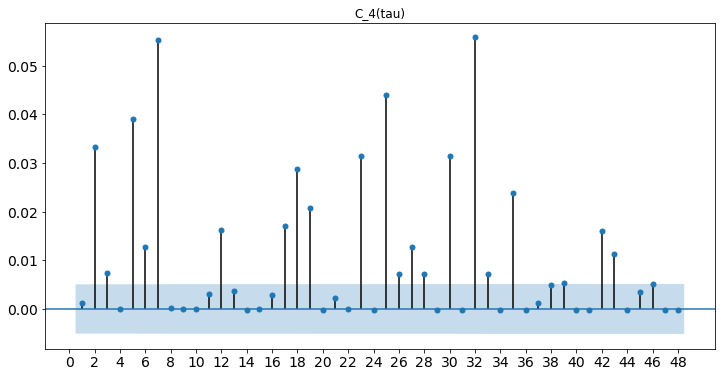

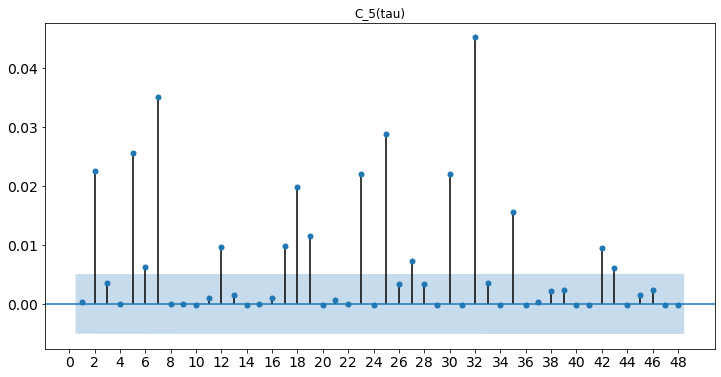

In [18]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(np.log(1+abs(data_ddpg['returns'].fillna(0))), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_0(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_2(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**3), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_3(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**4), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_4(tau)')
plt.show()

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(abs(data_ddpg['returns'].fillna(0)**5), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('C_5(tau)')
plt.show()

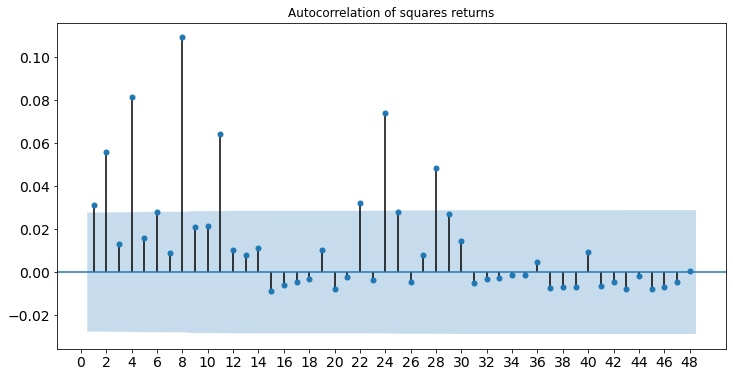

In [52]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'][:5000].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns')
plt.show()

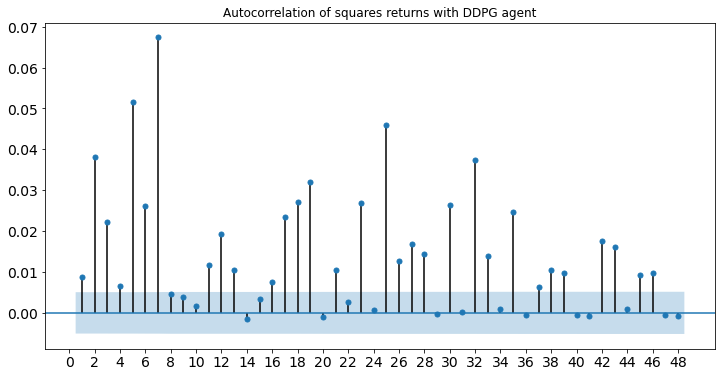

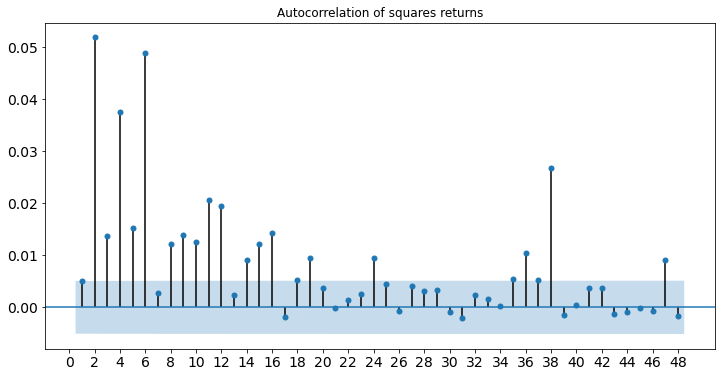

In [50]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns with DDPG agent')
plt.show()
#print('Dickey—Fuller_test_value: p=%f' % adfuller(data_ddpg['returns'].fillna(0)**2)[1])

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns')
plt.show()
#print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0)**2)[1])

-----
## Autocorrelation of returns

We'll observe simple linear cutocorrelation of returns and squared autocorrelation of returns.

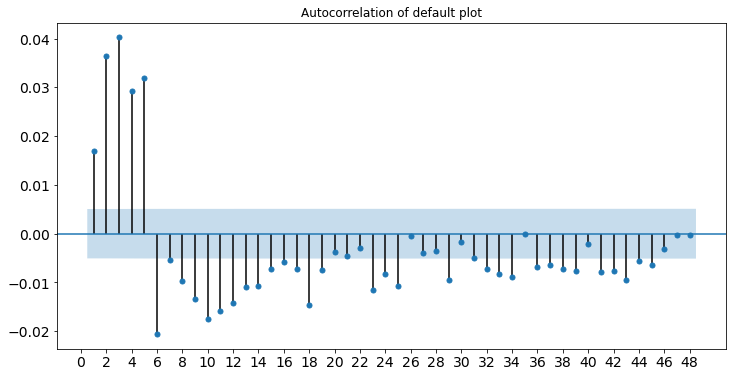

Dickey—Fuller_test_value: p=0.000000


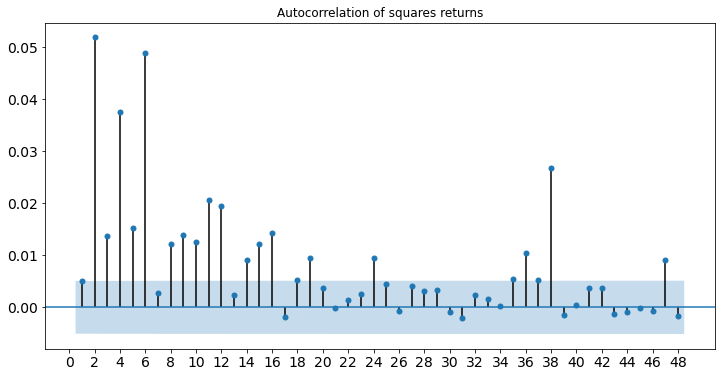

Dickey—Fuller_test_value: p=0.000000


In [12]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of default plot')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0))[1])

########

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_default['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_default['returns'].fillna(0)**2)[1])

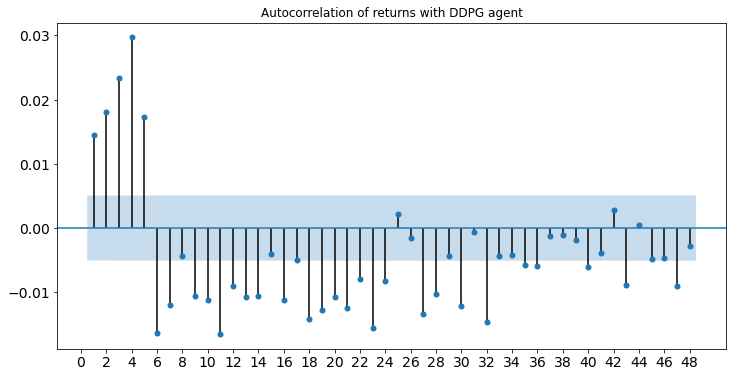

Dickey—Fuller_test_value: p=0.000000


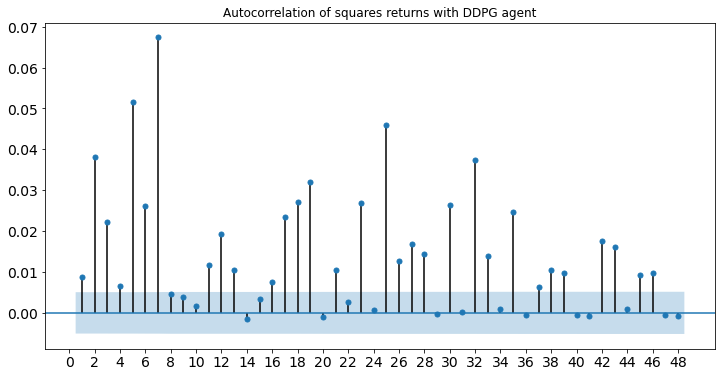

Dickey—Fuller_test_value: p=0.000000


In [13]:
plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0), lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of returns with DDPG agent')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_ddpg['returns'].fillna(0))[1])

########

plt.rcParams['figure.figsize'] = (12,6)
plot_acf(data_ddpg['returns'].fillna(0)**2, lags=48, zero = False)
plt.xticks(np.arange(0, 50, 2))
plt.title('Autocorrelation of squares returns with DDPG agent')
plt.show()
print('Dickey—Fuller_test_value: p=%f' % adfuller(data_ddpg['returns'].fillna(0)**2)[1])

----
## Q-Q plot values  
Here we use Q-Q plot to observe comparisons of sampled quantiles obtained during the implementation of our process with the normal distribution (???)  (Normal or Gaussian, what will be better?)

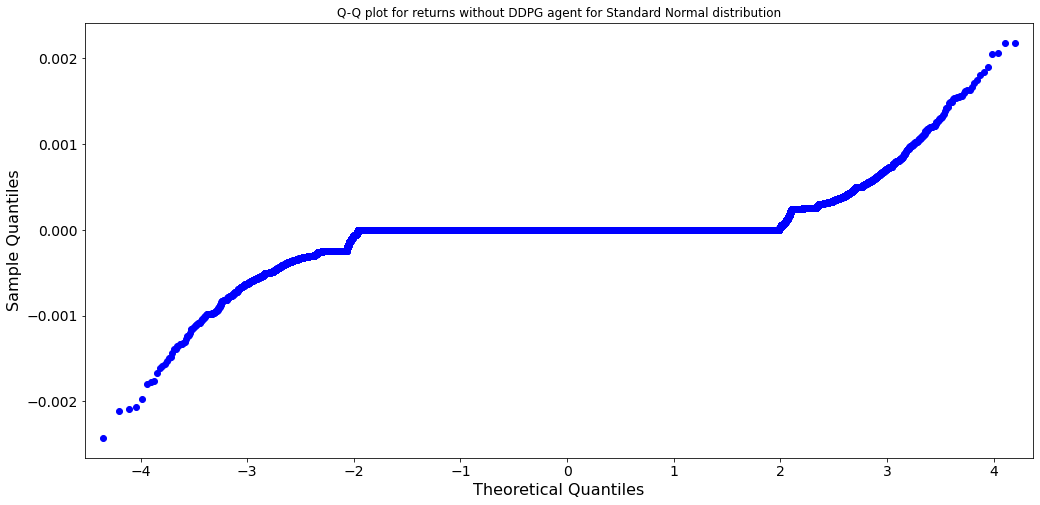

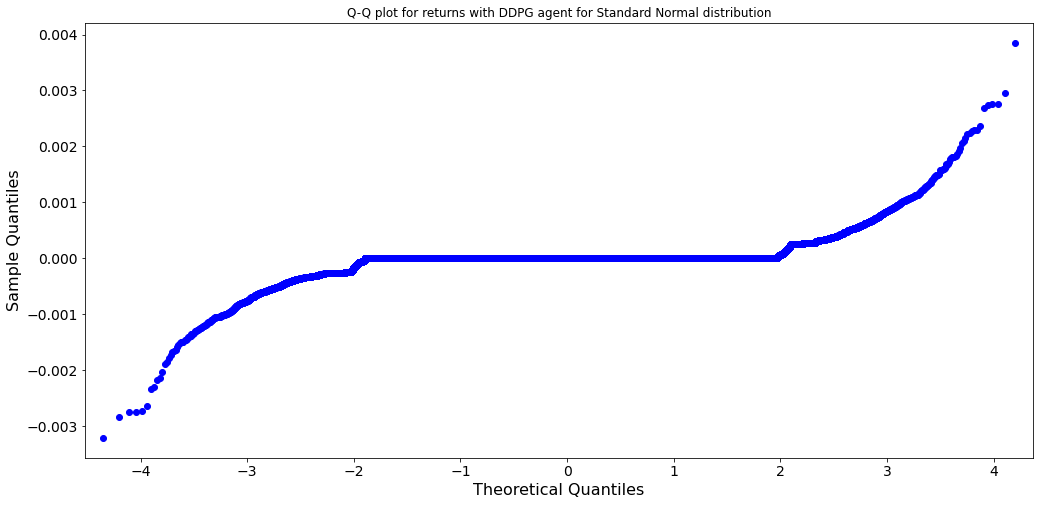

In [63]:
sm.qqplot(data_default['returns'], line = 's')
plt.title('Q-Q plot for returns without DDPG agent for Standard Normal distribution')
plt.show()
sm.qqplot(data_ddpg['returns'], line = 's')
plt.title('Q-Q plot for returns with DDPG agent for Standard Normal distribution')
plt.show()

### Q-Q plot without zeros

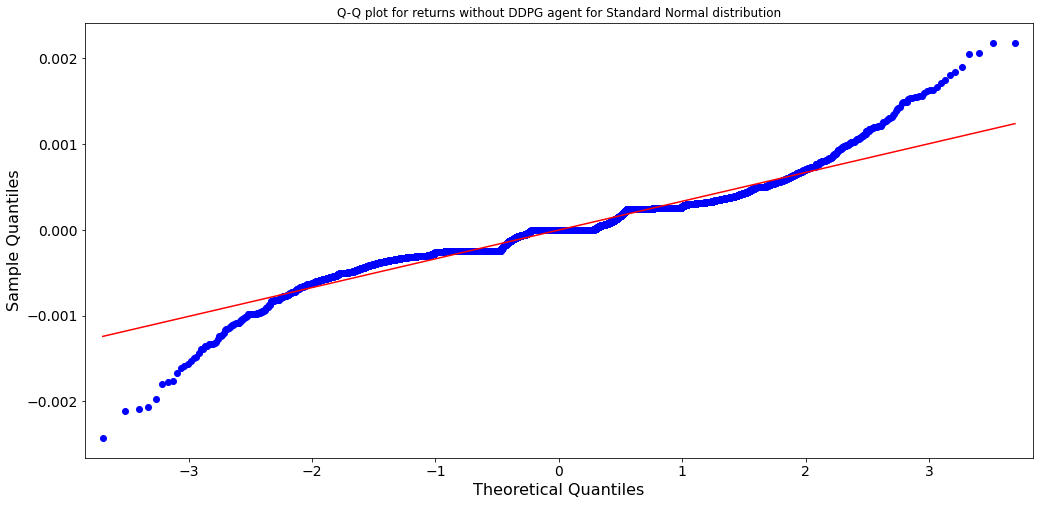

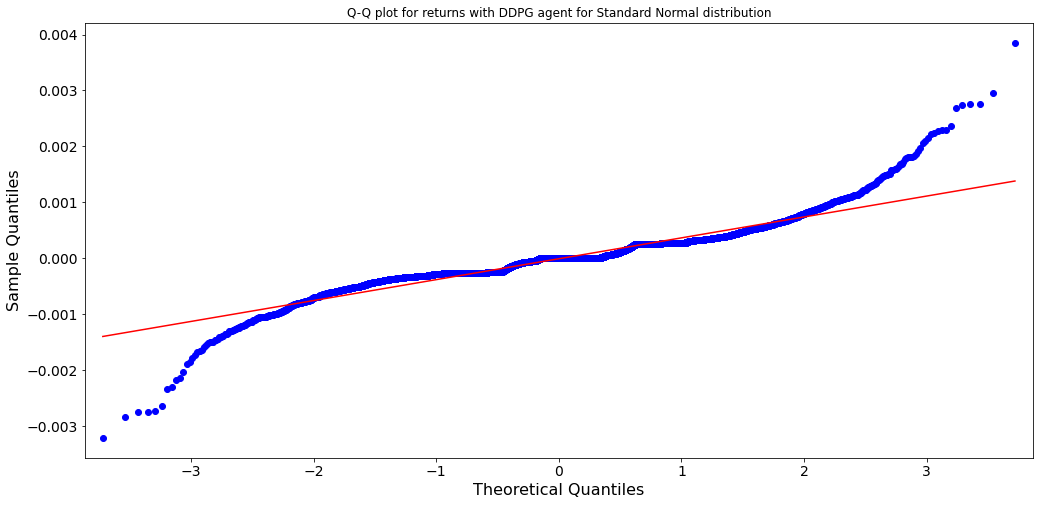

In [57]:
sm.qqplot(np.array(arr_default), line = 's')
plt.title('Q-Q plot for returns without DDPG agent for Standard Normal distribution')
plt.show()
sm.qqplot(np.array(arr_ddpg), line = 's')
plt.title('Q-Q plot for returns with DDPG agent for Standard Normal distribution')
plt.show()

------
### ECDF Plotting  

Let build empirical cumulative distribution function (ECDF) to compare 2 cumulative distributions

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

In [11]:
ecdf_default = ECDF(data_default['returns'].fillna(0))
ecdf_ddpg = ECDF(data_ddpg['returns'].fillna(0))

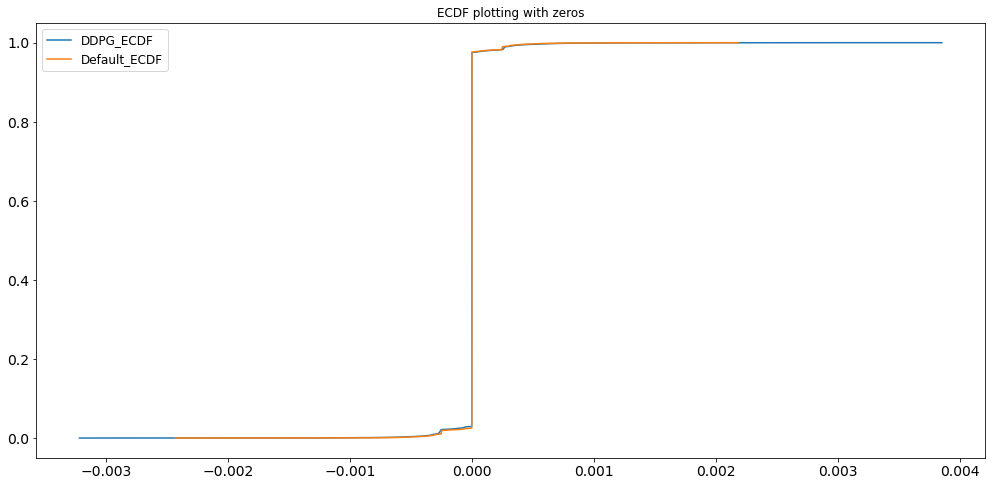

In [22]:
plt.plot(ecdf_ddpg.x, ecdf_ddpg.y, label = 'DDPG_ECDF')
plt.plot(ecdf_default.x, ecdf_default.y, label = 'Default_ECDF')
plt.legend()
plt.title('ECDF plotting with zeros')
plt.show()

### Model without zeros

In [18]:
ecdf_default_no_zer = ECDF(arr_default)
ecdf_ddpg_no_zer = ECDF(arr_ddpg)

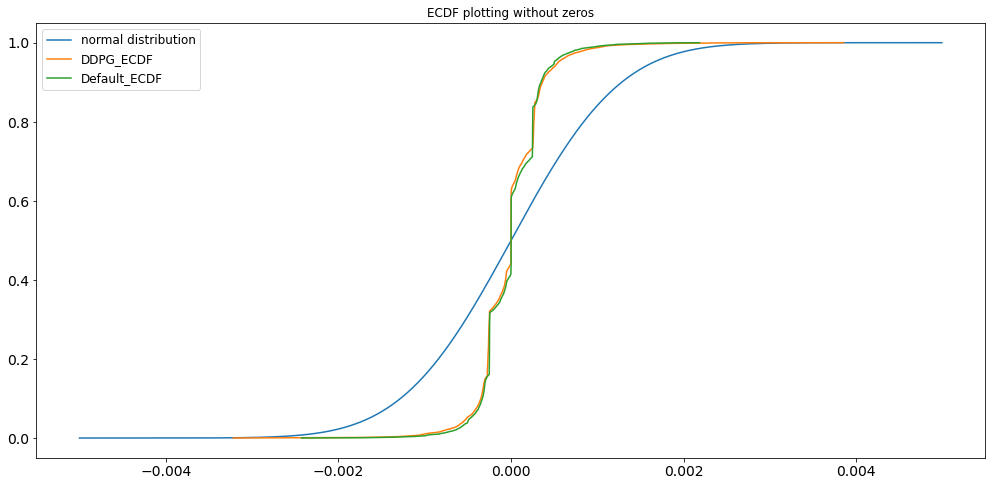

In [146]:
plt.plot(np.arange(-0.005,0.005,0.00001), [ss.norm.cdf(k) for k in np.arange(-5,5,0.01)], label = 'normal distribution')
plt.plot(ecdf_ddpg_no_zer.x, ecdf_ddpg_no_zer.y, label = 'DDPG_ECDF')
plt.plot(ecdf_default_no_zer.x, ecdf_default_no_zer.y, label = 'Default_ECDF')
plt.legend()
plt.title('ECDF plotting without zeros')
plt.show()

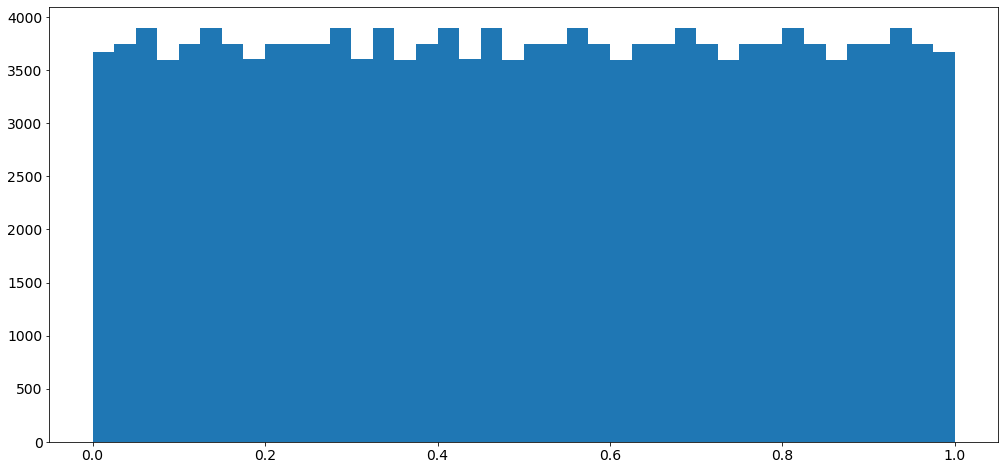

In [13]:
plt.hist(np.round(ecdf_default.y, 3), bins = 40)
plt.show()

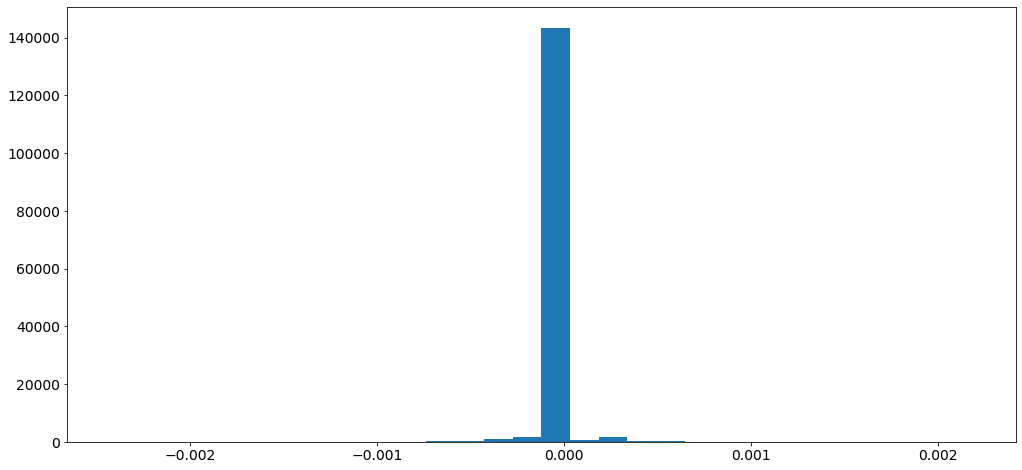

In [14]:
plt.hist(data_default['returns'].fillna(0), bins = 30)
plt.show()

In [100]:
rho = lambda x: ss.norm.pdf(x, loc = 0.05, scale = 0.003)

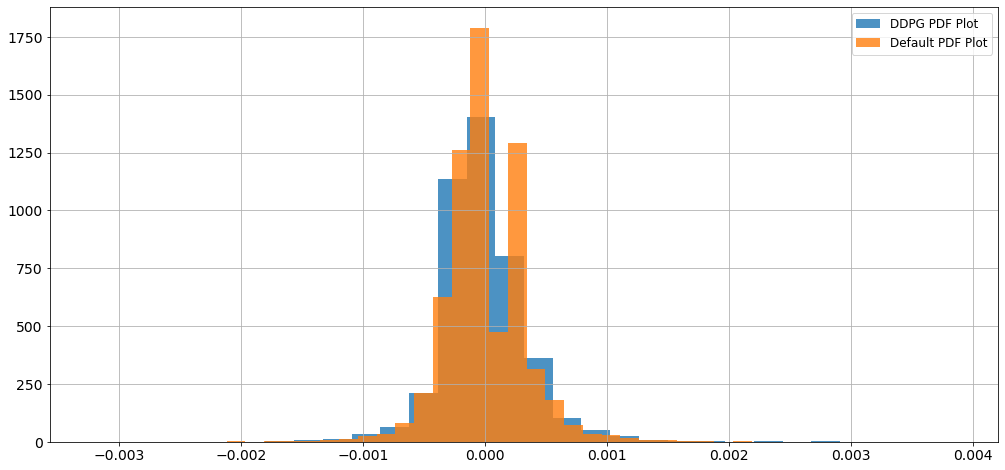

In [116]:
plt.hist(arr_ddpg, bins = 30, label = 'DDPG PDF Plot', density = True, alpha=0.8)
plt.hist(arr_default, bins = 30, label = 'Default PDF Plot', density = True, alpha=0.8)

plt.grid()
plt.legend()
plt.show()

------
## Hill estimating  
for returns!

In [8]:
statistics_order = np.sort(data_default['returns'].fillna(0))

Do we want to use module values here?  
Что делать если у нас в порядковых статистиках нули? (я ко всему ряду прибавил 1)

In [9]:
hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_default['returns'].fillna(0))))[:k]) - np.log(
    abs(np.sort(data_default['returns'].fillna(0))))[k]

hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_ddpg['returns'].fillna(0))))[:k]) - np.log(
    abs(np.sort(data_ddpg['returns'].fillna(0))))[k]

#Add one number

hill_estimator_default_one = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_default['returns'].fillna(0))[::-1]+1))[:k]) - np.log(
    abs(np.sort(data_default['returns'].fillna(0))[::-1]+1))[k]

hill_estimator_ddpg_one = lambda k: 1/k*np.sum(np.log(abs(np.sort(
    data_ddpg['returns'].fillna(0))[::-1]+1))[:k]) - np.log(
    abs(np.sort(data_ddpg['returns'].fillna(0))[::-1]+1))[k]

In [10]:
len(data_default['returns'])

150016

<ipython-input-11-fea3aae59020>:1: RuntimeWarning: divide by zero encountered in log
  hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-11-fea3aae59020>:2: RuntimeWarning: divide by zero encountered in log
  data_default['returns'].fillna(0))))[:k]) - np.log(
<ipython-input-11-fea3aae59020>:1: RuntimeWarning: invalid value encountered in double_scalars
  hill_estimator_default = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-11-fea3aae59020>:5: RuntimeWarning: divide by zero encountered in log
  hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(
<ipython-input-11-fea3aae59020>:6: RuntimeWarning: divide by zero encountered in log
  data_ddpg['returns'].fillna(0))))[:k]) - np.log(
<ipython-input-11-fea3aae59020>:5: RuntimeWarning: invalid value encountered in double_scalars
  hill_estimator_ddpg = lambda k: 1/k*np.sum(np.log(abs(np.sort(


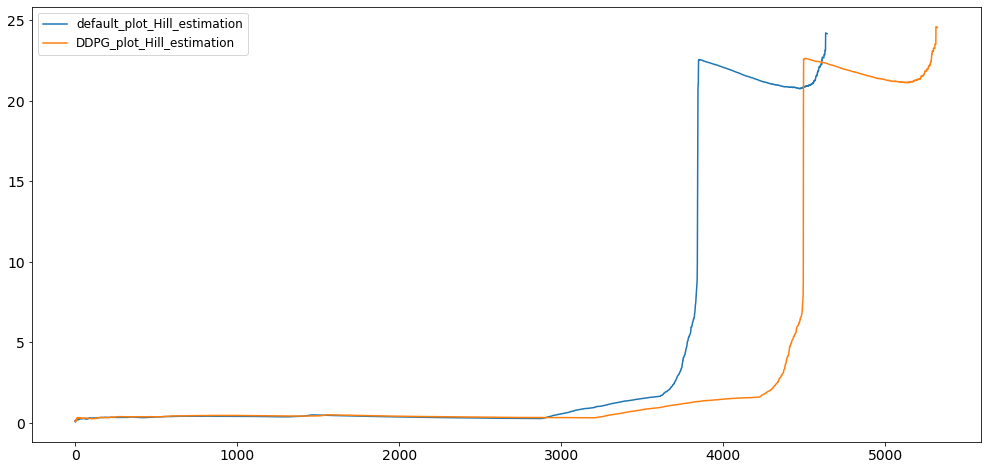

In [17]:
plt.plot([hill_estimator_default(t) for t in range(1, 10000)], label = 'default_plot_Hill_estimation')
plt.plot([hill_estimator_ddpg(t) for t in range(1, 10000)], label = 'DDPG_plot_Hill_estimation')
plt.legend()
plt.show()

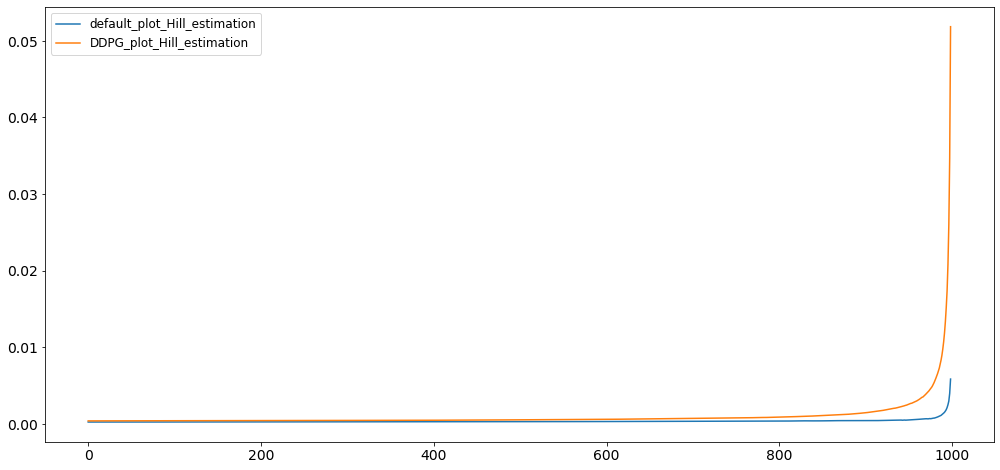

In [42]:
plt.plot([hill_estimator_default_one(t) for t in range(-1000, -1)], label = 'default_plot_Hill_estimation')
plt.plot([hill_estimator_ddpg_one(t) for t in range(-1000, -1)], label = 'DDPG_plot_Hill_estimation')
plt.legend()
plt.show()

In [11]:
ten_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.1)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.1))])
fifty_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.5)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.5))])
ninety_percent = np.array([hill_estimator_default_one(int(len(data_default['returns'])*0.9)), hill_estimator_ddpg_one(int(len(data_ddpg['returns'])*0.9))])

Добавить 1 и 5 процентов

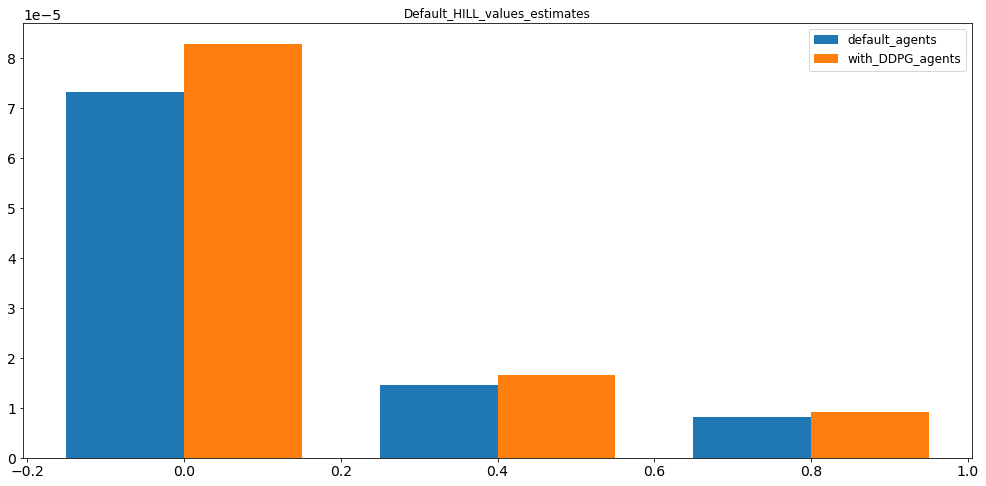

In [12]:
ax1 = np.transpose([ten_percent, fifty_percent, ninety_percent])[0]
ax2 = np.transpose([ten_percent, fifty_percent, ninety_percent])[1]
labels = [0.1, 0.5, 0.9]
x = np.arange(0, 1, 0.4)
width = 0.15

fig, ax = plt.subplots()
react1 = ax.bar(x-width/2, ax1, width, label = 'default_agents')
react2 = ax.bar(x+width/2, ax2, width, label = 'with_DDPG_agents')
#ax.set_xticklabels(labels)
ax.set_title("Default_HILL_values_estimates")
plt.legend()
plt.show()

LogLog ranksize regression

In [11]:
data_33 = data_default['returns'].fillna(0)
ln_data = np.log(data_default + 1).fillna(0)

<ipython-input-11-e4a269548ec3>:2: RuntimeWarning: invalid value encountered in log
  ln_data = np.log(data_default + 1).fillna(0)


In [12]:
exp_reg = LinearRegression()
exp_reg.fit(ln_data, data_33)

LinearRegression()

In [24]:
df_lr = pd.DataFrame({'rank':np.log10(range(1,data_33.shape[0]+1)[:-140000]),
                      'degree':np.log10(sorted(data_33+1,reverse=True))[:-140000]})

In [25]:
X = df_lr[['rank']]
Y = df_lr[['degree']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 degree   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.052e+05
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:47:15   Log-Likelihood:                 91466.
No. Observations:               10016   AIC:                        -1.829e+05
Df Residuals:                   10014   BIC:                        -1.829e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007   2.17e-06    343.922      0.000       0.001       0.001
rank          -0.0002   6.04e-07   -324.346      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2890.127   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25897.489
Skew:                           1.126   Prob(JB):                         0.00
Kurtosis:                      10.549   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params

const    0.000746
rank    -0.000196
dtype: float64

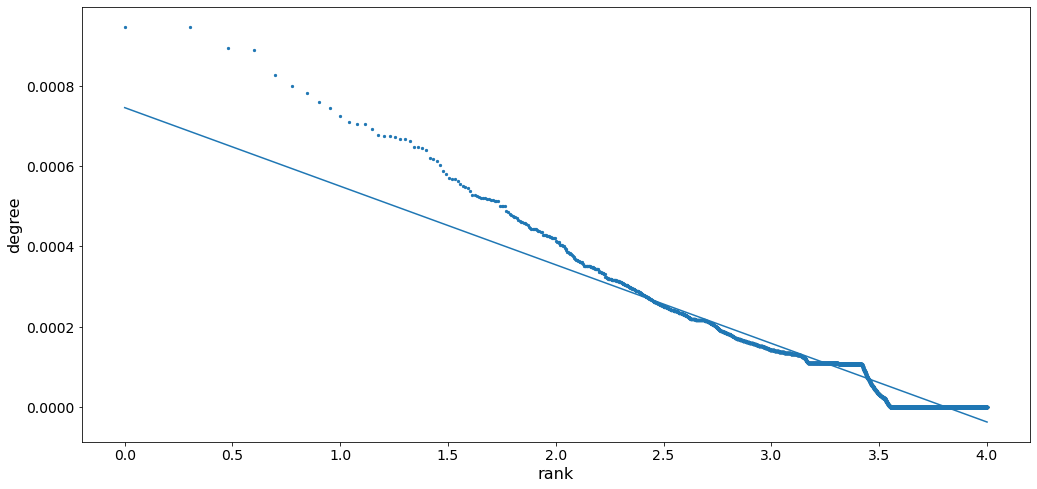

In [28]:
ax = df_lr.plot(x='rank', y='degree', kind='scatter',s=5)
ax.plot(df_lr['rank'], model.params['const'] + model.params['rank'] * df_lr['rank'])
plt.show()

In [29]:
model.params['rank']

-0.0001958024389456464

In [10]:
np.std(np.arange(9).reshape(3,3))

2.581988897471611